# SWMAL

## Setup of Yolov5 on GPU Cluster

Most packages are ready on the GPU Cluster when you are running under an Anaconda 2021.11.

We can finalize your setup both first cloning the Yolov5 git-repository

In [1]:
! (test ! -d yolov5 && git clone https://github.com/ultralytics/yolov5) || echo "Git-repository already cloned.."

Cloning into 'yolov5'...
remote: Enumerating objects: 12390, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 12390 (delta 1), reused 7 (delta 1), pack-reused 12383
Receiving objects: 100% (12390/12390), 11.56 MiB | 6.82 MiB/s, done.
Resolving deltas: 100% (8620/8620), done.


and then `pip` installing the missing packages (that are incompatible with a `conda` install). 

First we install a specific set of packages for the `torch` framework that will work with even the newest GPUs (3090 RTX), and let this run for about 2 to 15 min (its slow to install):

In [2]:
! pip install torch==1.10.1+cu111 torchvision==0.11.2+cu111 torchaudio==0.10.1 -f https://download.pytorch.org/whl/torch_stable.html

Defaulting to user installation because normal site-packages is not writeable
Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Using cached https://download.pytorch.org/whl/cu111/torch-1.10.1%2Bcu111-cp39-cp39-linux_x86_64.whl (2137.7 MB)
  Using cached https://download.pytorch.org/whl/cu111/torchvision-0.11.2%2Bcu111-cp39-cp39-linux_x86_64.whl (24.5 MB)
  Using cached https://download.pytorch.org/whl/rocm4.1/torchaudio-0.10.1%2Brocm4.1-cp39-cp39-linux_x86_64.whl (2.7 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


The we `pip` install whatever packages, that Yolov5 still needs  (since they are still incompatible with a `conda` install):

In [3]:
! pip install -r yolov5_swmal_requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.5 MB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached thop-0.0.31.post2005241907-py3-none-any.whl (8.7 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-manylinux2010_x86_64.whl (4.9 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.4.1 requires flatbuffers~=1.12.0, but you have flatbuffers 2.0 which is incompatible.
tensorflow 2.4.1 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.
tensorflow 2.4.1 requires grpcio~=1.32.0, but you have grpcio 1.42.0 which is incompatible.
tensorflow 2.4.1 requires numpy~=1

You should now have the reqired setup for Yolov5, and I took care of installing specific GPU libraries needed for running Yolov5 on even the newest GPUs (3090). 

The user installed packages (found in you `~/.local/lib/python3.9/site-packages/` dir) now looks like:

In [4]:
! pip list --user
! echo ; echo "DIR of local packages.." ; echo
! ls ~/.local/lib/python3.9/site-packages/

Package                 Version
----------------------- ---------------------
opencv-python           4.5.5.64
tensorboard             2.8.0
tensorboard-data-server 0.6.1
thop                    0.0.31.post2005241907
torch                   1.10.1+cu111
torchaudio              0.10.1+rocm4.1
torchvision             0.11.2+cu111

DIR of local packages..

caffe2					 thop-0.0.31.post2005241907.dist-info
cv2					 torch
opencv_python-4.5.5.64.dist-info	 torch-1.10.1+cu111.dist-info
opencv_python.libs			 torchaudio
tensorboard				 torchaudio-0.10.1+rocm4.1.dist-info
tensorboard-2.8.0.dist-info		 torchvision
tensorboard_data_server			 torchvision-0.11.2+cu111.dist-info
tensorboard_data_server-0.6.1.dist-info  torchvision.libs
thop


An now you can test out a demo of Yolov5 -- one that predicts on the image `Figs/zidane.jpg`:

In [ ]:
#!/usr/bin/env python3

import torch
import sys
    
def Versions():
    print("VERSIONS:")
    print(f"  sys.version                              = {sys.version}")
    print(f"  torch.__version__                        = {torch.__version__}")
   
    hasCuda = torch.cuda.is_available()
    print(f"  torch.cuda.is_available()                = {hasCuda}")
    if hasCuda:
        print(f"  torch.backends.cudnn.enabled             = {torch.backends.cudnn.enabled}")
        device = torch.device("cuda")
        print(f"  torch.cuda.get_device_properties(device) = {torch.cuda.get_device_properties(device)}")
        print(f"  torch.tensor([1.0, 2.0]).cuda()          = {torch.tensor([1.0, 2.0]).cuda()}")
        

def PredictDemo():
    # Model
    model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5l, yolov5x, custom

    # Images
    #img = 'https://ultralytics.com/images/zidane.jpg'  # or file, Path, PIL, OpenCV, numpy, list
    img = 'Figs/zidane.jpg'

    # Inference
    results = model(img)

    # Results
    results.print()  # or .show(), .save(), .crop(), .pandas(), etc.
    #results.show()
    results.save('temp.jpg')
    
Versions()
PredictDemo()

print("OK")

If succefull an output prediction image will be placed in the temp.jpg/ or in runs/detect/expNN so look for the output line from the cell, similar to

```
VERSIONS:
  sys.version                              = 3.9.7 ...
  torch.__version__                        = 1.11.0+cpu
  torch.cuda.is_available()                = False

Using cache found in C:\Users\au204573/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-4-3 torch 1.11.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 720x1280 2 persons, 2 ties
Speed: 31.6ms pre-process, 298.2ms inference, 2.2ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to temp.jpg
```

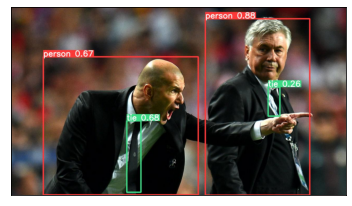

In [24]:
%matplotlib inline

from matplotlib import pyplot as plt
import cv2

def ShowImg(imgfilename):
    img = cv2.imread(imgfilename, 1)
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Converts from one colour space to the other

    plt.imshow(img2)
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()
    

#ShowImg('runs/detect/exp2/zidane.jpg')
ShowImg('temp.jpg/zidane.jpg')